## For DAVIS Data images

In [8]:

def vconcat_resize_min(im_list, interpolation=cv2.INTER_CUBIC):
    h_min = min(im.shape[0] for im in im_list)
    im_list_resize = [cv2.resize(im, (int(im.shape[0] * h_min / im.shape[0]), h_min), interpolation=interpolation)
                      for im in im_list]
    return cv2.hconcat(im_list_resize)

In [67]:
IMAGES0, IMAGES1, BOXES = list(), list(), list()

In [92]:
image_root = '/mnt/disk1/img_data/DAVIS/2017/DAVIS/JPEGImages/again/'
annot_root = '/mnt/disk1/img_data/DAVIS/2017/DAVIS/Annotations/again/'
file = "kite-walk"

images = glob.glob(os.path.join(image_root, file, "*.jpg"))
annotations = glob.glob(os.path.join(annot_root, file, "*.png"))
images.sort()
annotations.sort()

In [93]:
with open(os.path.join(annot_root, file, "label.json"), "r") as f:
    JSON = json.load(f)

In [104]:
plt.imsave("DAVIS_label.png", cv2.vconcat(IMAGES1))


## For VOC Dataset

In [25]:
from vision.datasets.voc_dataset import VOCDataset, VOCDataset_Scale
import torch 
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from torch.utils.data import DataLoader, ConcatDataset, Dataset
VOC_ROOT = "/mnt/disk1/img_data/VOCdevkit/VOC2007"

In [135]:
dataset = VOCDataset(root=VOC_ROOT, transform=None, target_transform=None, is_test=False)

dataloader = DataLoader(dataset, shuffle=True, batch_size=1, num_workers=1)

IMAGES = list()
BOXES = list()

In [143]:
image, box, label = iter(dataloader).next()

im = image[0].numpy()
for i in range(len(box[0])):
    im = cv2.rectangle(im, (box[0,i,0], box[0,i,1]), (box[0,i,2], box[0,i,3]), (255, 0, 0), 3)
im = cv2.resize(im, (300,300))
    
IMAGES.append(im)
BOXES.append(box)

True

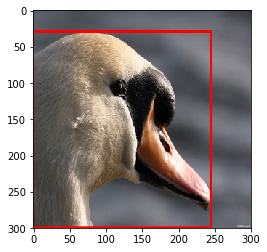

In [144]:
plt.imshow(IMAGES[0]), len(IMAGES)

target = cv2.vconcat(IMAGES)
cv2.imwrite("voc_train.png", target[:,:,::-1])

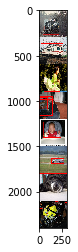

In [112]:
plt.imshow(target)

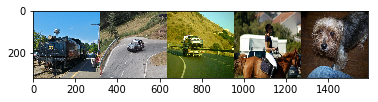

In [31]:
plt.imshow(a[:,:,::-1])

In [33]:
h = 480
w = 854
IMAGES = list()

In [23]:
im = cv2.imread('../original_ssd/images/grid_shift/5pix-X/DAVIS/vgg16-ssd/dog/00036/det[-5pix*0]_[fm10_anchor5_xy[3 3]].jpg')
IMAGES.append(cv2.resize(im, (w,h)))
im = cv2.imread('../original_ssd/images/grid_shift/5pix-X/DAVIS/vgg16-ssd/longboard/00036/det[-5pix*0]_[fm5_anchor5_xy[1 2]].jpg')
IMAGES.append(cv2.resize(im, (w,h)))
im = cv2.imread('../original_ssd/images/grid_shift/5pix-X/DAVIS/vgg16-ssd/dancing/00028/det[-5pix*0]_[fm19_anchor5_xy[9 9]].jpg')
IMAGES.append(cv2.resize(im, (w,h)))

cv2.imwrite('blur.png', cv2.vconcat(IMAGES))

In [29]:
im = cv2.imread('../original_ssd/images/grid_shift/5pix-X/DAVIS/vgg16-ssd/bmx-trees/00020/det[-5pix*0]_[fm19_anchor5_xy[8 8]].jpg')
IMAGES.append(cv2.resize(im, (w,h)))

im = cv2.imread('../original_ssd/images/grid_shift/5pix-X/DAVIS/vgg16-ssd/bus/00070/det[-5pix*0]_[fm3_anchor0_xy[1 1]].jpg')
IMAGES.append(cv2.resize(im, (w,h)))

im = cv2.imread('../original_ssd/images/grid_shift/5pix-X/DAVIS/vgg16-ssd/libby/00024/det[-5pix*0]_[fm19_anchor1_xy[ 9 11]].jpg')
IMAGES.append(cv2.resize(im, (w,h)))


In [30]:
cv2.imwrite('occlusion.png', cv2.vconcat(IMAGES))

True

In [34]:
im = cv2.imread('../original_ssd/images/grid_shift/5pix-X/DAVIS/vgg16-ssd/mallard-water/00026/det[-5pix*0]_[fm5_anchor1_xy[1 2]].jpg')
IMAGES.append(cv2.resize(im, (w,h)))

im = cv2.imread('../original_ssd/images/grid_shift/5pix-X/DAVIS/vgg16-ssd/breakdance-flare/00050/det[-5pix*0]_[fm10_anchor0_xy[5 4]].jpg')
IMAGES.append(cv2.resize(im, (w,h)))

im = cv2.imread('../original_ssd/images/grid_shift/5pix-X/DAVIS/vgg16-ssd/dogs-scale/00058/det[-5pix*0]_[fm10_anchor1_xy[6 2]].jpg')
IMAGES.append(cv2.resize(im, (w,h)))


In [35]:
cv2.imwrite('disturb.png', cv2.vconcat(IMAGES))

True

In [14]:
import torch
import numpy as np
import os, sys, json, csv
import pandas as pd
import matplotlib.pyplot as plt
from collections import namedtuple, defaultdict

In [84]:
csv_file = "/mnt/hdd01/result_MIRU2019/analyse_fragment/vgg16_sigmoid_thresh/ww_0406/run03/grid_success/bmx-bumps/000010/result_10.csv"


In [95]:
result = pd.read_csv(csv_file)
data = result[result['track_box_index']==6867].values
float(data[0, 9].split("(")[1].split(",")[0])

'0.0003'

In [1]:
import cv2
import numpy as np
import json, pickle, sys, os, glob
import matplotlib.pyplot as plt
%matplotlib inline
import os, sys, json
import pandas as pd

In [2]:

def from_result_to_plot(result, INDEX=None, color=None, legend=False, S=1):
    plt.rcParams['font.size'] = 25
    plt.rcParams['legend.fontsize'] = 20
    plt.rcParams['legend.handlelength'] = 2
    plt.figure(figsize=(20,10))
    
    
    plt.tick_params(labelbottom=False,
                    labelleft=True,
                    labelright=False,
                    labeltop=False)
    plt.tick_params(bottom=False,
                    left=True,
                    right=False,
                    top=False)
    
#     INDEX = result['track_box_index'].unique()
    
#     for N, index in enumerate(INDEX):
    for N, index in zip(color, INDEX):
        data = result[result['track_box_index']==index].values
        num = len(data) # 60
        fm = data[0,4]
        anchor = data[0,5]
        y = data[0,6]
        x = data[0,7]

        if type(data[0,9]) == str:
            data[:, 9] = np.array([float(x.split("(")[1].split(",")[0]) for x in data[:,9]])
        
        
        plt.plot(data[:int(num/2),8], data[:int(num/2),9], marker=GRID[fm], color=list(np.array(rectangle_color[N])/255), alpha=0.5, \
                 markersize=20)
        plt.plot(data[int(num/2):,8], data[int(num/2):,9], marker=GRID[fm], color=list(np.array(rectangle_color[N])/255), alpha=0.5, \
                 markersize=20, label=f'{index}-[{fm}_{anchor}_{y}_{x}]')
    plt.grid()
    plt.xticks(np.arange(0, 60, 10), np.arange(-30, 30, 10))
    if legend:
        plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)
        plt.subplots_adjust(left=0.1, right=0.8)
#     plt.xlabel('grid-factor')
#     plt.ylabel('probability')
    plt.xlim(0, int(num))
    plt.ylim(-0.1, 1.1)
    plt.hlines(y=0.6, xmin=0, xmax=int(num)+1, colors='r', linestyles='dashed')
    plt.savefig('../detect_result/analyse_fragment/thesis_image/image{}.png'.format(S))


In [20]:
anchor_index = [10481, 10487]
# file = "grid/horsejump-high/000014/obj1/result_14.csv"
file = "grid"

True


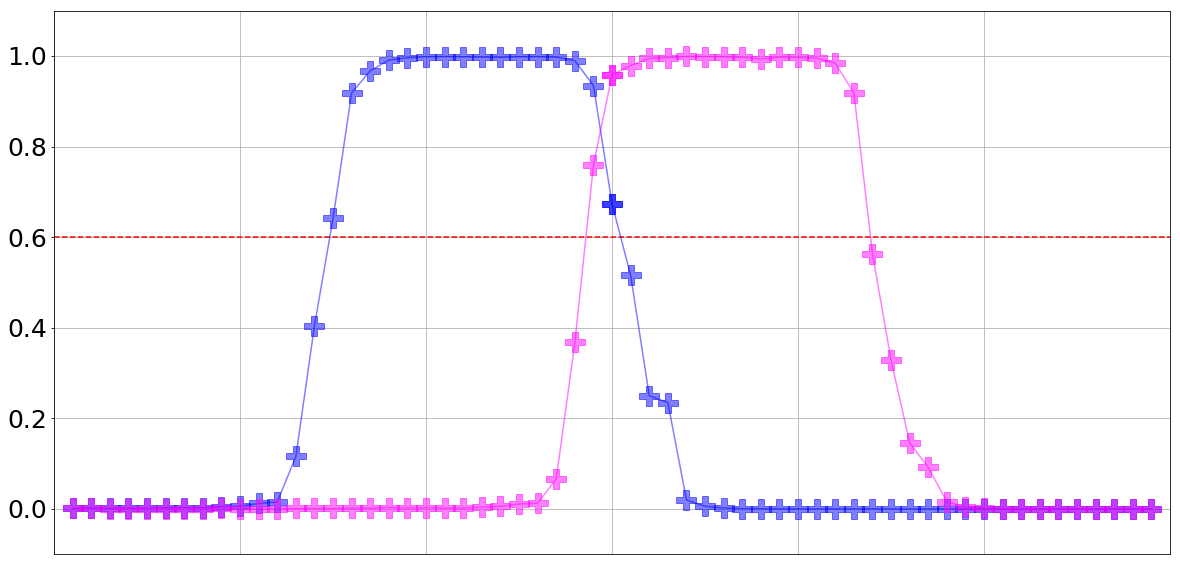

In [22]:
# csv_file = '/mnt/hdd01/img_data/DAVIS_boundary/basic_compare_old_method/scale_1.02/vgg16-ssd/kite-walk/000065/result_65.csv'
# csv_file = '/mnt/hdd01/img_data/DAVIS_boundary/basic_compare_old_method/grid_3pix/vgg16-ssd/bmx-bumps/000010/result_10.csv'

# csv_file = "/mnt/hdd01/result_MIRU2019/analyse_fragment/vgg16_basic_multilabel_thresh02/grid/stroller/000003/obj0/result_3.csv"
# csv_file = "/mnt/hdd01/result_MIRU2019/analyse_fragment/thesis_image/grid/stroller/000003/obj0/result_3.csv"
# csv_file = "/mnt/hdd01/result_MIRU2019/analyse_fragment/thesis_image/scale/kid-football/000041/obj0/result_41.csv"
# csv_file = "/mnt/hdd01/result_MIRU2019/analyse_fragment/vgg16_basic_multilabel_thresh02/{}".format(file)

csv_file = "/mnt/hdd01/result_MIRU2019/analyse_fragment/resnet50_std/multi-step_multilabel_thresh02/grid/soapbox/000052/obj0/result_52.csv"

csv_file = "/mnt/hdd01/result_m2det/analyse_fragment/ft_alllayer/basic/grid/stunt/000013/obj0/result_13.csv"


print(os.path.isfile(csv_file))

result = pd.read_csv(csv_file)
rectangle_color = [(255,0,0), (0,0,255), (255,0,255), (0,128,0), (0,255,255), (228,155,15), (0,0,0), \
                    (128,0,0), (0,0,128), (128,0,128), (0,64,0), (0, 255, 65), (0,128,128), (128,128,0), ] * 3
# GRID = ['o', 'P', '*', 'D', '^', '_', 's', '4', 'H', 'X', '|', 'v'] * 3
# ANCHOR = ['o', 'P', '*', 'D', '^', '_', 's', '4', 'H', 'X', '|', 'v'] * 3

# GRID = {38:'o', 19:'P', 10:'*', 5:'D', 3:'^', 2:'s', 1:'X'}
GRID = {40:'o', 20:'P', 10:'*', 5:'D', 3:'^', 2:'s', 1:'X'}
ANCHOR = ['o', 'P', '*', 'D', '^', 'X', '_', 's', '4', 'H',  '|', 'v'] * 3

from_result_to_plot(result, INDEX=anchor_index, color=[1,2], S=1)
# from_result_to_plot(result, INDEX=[6877, 6883], color=[1,2], S=1)

True


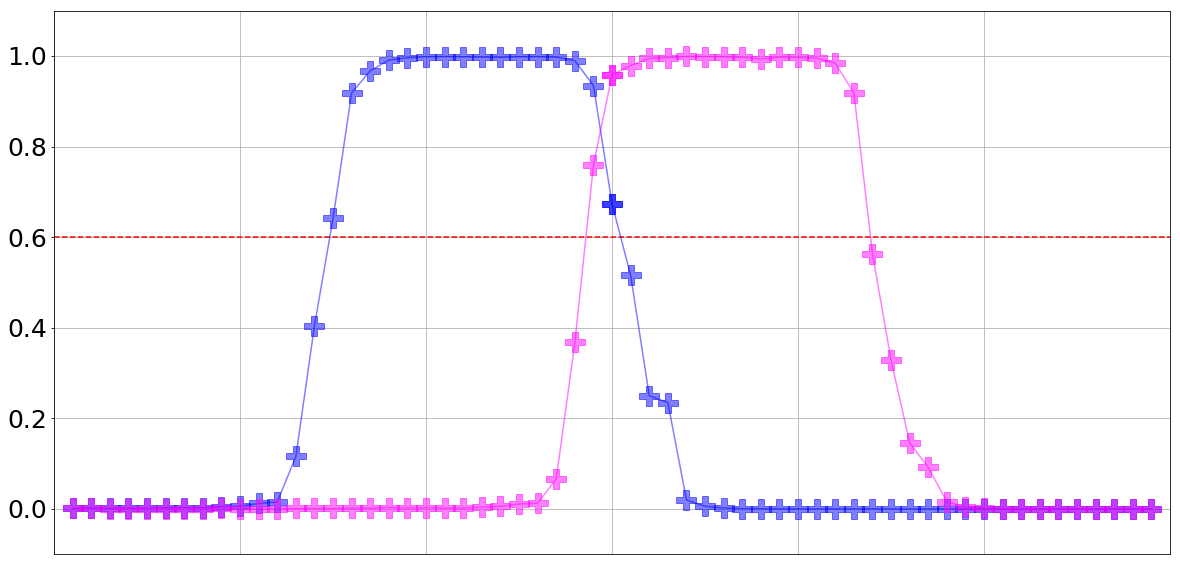

In [23]:
# csv_file = "/mnt/hdd01/result_MIRU2019/analyse_fragment/thesis_image/scale/kid-football/000041/obj0/result_41.csv"
# csv_file = "/mnt/hdd01/result_MIRU2019/analyse_fragment/thesis_image/sigmoid/{}".format(file)

csv_file = "/mnt/hdd01/result_MIRU2019/analyse_fragment/thesis_image/resnet50/sigmoid/grid/soapbox/000052/obj0/result_52.csv"

csv_file = "/mnt/hdd01/result_m2det/analyse_fragment/thesis_image/grid/stunt/000013/obj0/result_13.csv"

print(os.path.isfile(csv_file))

result = pd.read_csv(csv_file)
rectangle_color = [(255,0,0), (0,0,255), (255,0,255), (0,128,0), (0,255,255), (228,155,15), (0,0,0), \
                    (128,0,0), (0,0,128), (128,0,128), (0,64,0), (0, 255, 65), (0,128,128), (128,128,0), ] * 3
# GRID = ['o', 'P', '*', 'D', '^', '_', 's', '4', 'H', 'X', '|', 'v'] * 3
# ANCHOR = ['o', 'P', '*', 'D', '^', '_', 's', '4', 'H', 'X', '|', 'v'] * 3

GRID = {38:'o', 19:'P', 10:'*', 5:'D', 3:'^', 2:'s', 1:'X'}
GRID = {40:'o', 20:'P', 10:'*', 5:'D', 3:'^', 2:'s', 1:'X'}
ANCHOR = ['o', 'P', '*', 'D', '^', 'X', '_', 's', '4', 'H',  '|', 'v'] * 3

from_result_to_plot(result, INDEX=anchor_index, color=[1,2], S=2)
# from_result_to_plot(result, INDEX=[6877, 6883], color=[1,2], S=2)